In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
import warnings
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")

# Teams

In [5]:
home= "Augsburg"
away= "Freiburg"

In [6]:
df_home= pd.read_csv(f"../Data/{home}.csv")
df_home["Date"] = pd.to_datetime(df_home["Date"]) 
df_home.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,Poss,PKatt,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
18,Augsburg,Heidenheim,2025-01-25,W,H,2,1,1,60,0,...,1.1,0.9,0.9,0.9,0.9,0.10,0,1.3,0.21,0.3
19,Augsburg,St. Pauli,2025-02-01,D,A,1,1,0,55,0,...,0.3,0.8,0.7,0.7,0.7,0.16,0,0.4,0.38,0.4
20,Augsburg,Mainz 05,2025-02-08,D,A,0,0,0,34,0,...,0.3,0.3,-0.3,-0.3,-0.3,0.04,0,1.8,0.36,1.8
21,Augsburg,RB Leipzig,2025-02-14,D,H,0,0,0,39,0,...,0.9,1.7,-1.0,-1.0,-0.9,0.09,0,0.8,0.21,0.8
22,Augsburg,Gladbach,2025-02-22,W,A,3,0,3,51,0,...,1.3,2.1,1.5,1.5,1.7,0.09,2,1.9,0.54,1.9


In [7]:
df_vs_home= pd.read_csv(f"../Data/vs {home}.csv")
df_vs_home["Date"] = pd.to_datetime(df_vs_home["Date"]) 
df_vs_home.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,Poss,PKatt,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
18,Heidenheim,Augsburg,2025-01-25,L,A,1,2,-1,40,0,...,1.1,0.9,-0.2,-0.2,-0.1,0.11,0,1.8,0.30,-0.2
19,St. Pauli,Augsburg,2025-02-01,D,H,1,1,0,45,0,...,0.4,0.9,-0.8,-0.8,-0.4,0.14,0,0.7,0.75,-0.3
20,Mainz 05,Augsburg,2025-02-08,D,H,0,0,0,66,0,...,0.8,1.4,-1.3,-1.3,-0.8,0.17,0,0.6,0.30,0.6
21,RB Leipzig,Augsburg,2025-02-14,D,A,0,0,0,61,0,...,0.7,1.5,-1.2,-1.2,-0.7,0.09,0,0.4,0.21,0.4
22,Gladbach,Augsburg,2025-02-22,L,H,0,3,-3,49,0,...,0.6,0.7,-1.0,-1.0,-0.6,0.15,0,1.2,0.30,-1.8


In [8]:
df_away= pd.read_csv(f"../Data/{away}.csv")
df_away["Date"] = pd.to_datetime(df_away["Date"]) 
df_away.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,Poss,PKatt,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
18,Freiburg,Bayern Munich,2025-01-25,L,H,1,2,-1,35,0,...,0.4,0.6,0.7,0.7,0.6,0.05,0,1.2,0.39,-0.8
19,Freiburg,Bochum,2025-02-01,W,A,1,0,1,42,0,...,1.2,1.2,-0.7,-0.7,-0.2,0.13,1,0.8,0.20,0.8
20,Freiburg,Heidenheim,2025-02-08,W,H,1,0,1,53,0,...,1.0,1.5,0.0,0.0,0.0,0.11,0,0.8,0.16,0.8
21,Freiburg,St. Pauli,2025-02-15,W,A,1,0,1,46,1,...,0.3,0.4,-1.3,-0.5,-0.3,0.12,2,0.0,0.03,0.0
22,Freiburg,Werder Bremen,2025-02-21,W,H,5,0,5,37,0,...,1.4,0.9,3.2,3.2,1.6,0.14,1,1.1,0.13,1.1


In [9]:
df_vs_away= pd.read_csv(f"../Data/vs {away}.csv")
df_vs_away["Date"] = pd.to_datetime(df_away["Date"]) 
df_vs_away.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,Poss,PKatt,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
18,Bayern Munich,Freiburg,2025-01-25,W,A,2,1,1,65,0,...,0.3,0.7,1.0,1.0,1.7,0.14,0,1.0,0.48,0.0
19,Bochum,Freiburg,2025-02-01,L,H,0,1,-1,58,0,...,0.7,0.7,-1.0,-1.0,-0.7,0.04,0,1.6,0.40,0.6
20,Heidenheim,Freiburg,2025-02-08,L,A,0,1,-1,47,0,...,0.4,1.1,-0.5,-0.5,-0.4,0.05,0,1.4,0.47,0.4
21,St. Pauli,Freiburg,2025-02-15,L,H,0,1,-1,54,0,...,0.2,0.5,-0.2,-0.2,-0.2,0.03,0,1.3,0.14,1.3
22,Werder Bremen,Freiburg,2025-02-21,L,A,0,5,-5,63,1,...,0.2,0.7,-1.2,-0.4,-0.2,0.06,0,2.9,0.49,-2.1


In [10]:
print(list(df_away.columns))

['Team', 'Opp', 'Date', 'Result', 'H/A', 'GF', 'GA', 'GD', 'Poss', 'PKatt', 'G-PK', 'PK', 'PKm', 'Att (GK)', 'Thr', 'Pa Launch%', 'Pa AvgLen', 'Won', 'Lost', 'Won%', 'Att To', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries', 'TotDist', 'PrgDist', 'PrgC', 'Last3rd Car', 'OppCr', 'Stp', 'Stp%', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld', 'GCA', 'PassLive Gc', 'PassDead Gc', 'TO Gc', 'Sh-Gc', 'Fld Gc', 'Def-Gc', 'GK Att', 'Launch%', 'AvgLen', 'Sh', 'G/Sh', 'G/SoT', 'SoT', 'SoT%', 'Dist', 'FK', 'Off', 'PKwon', 'PKcon', 'OG', 'Recov', '#OPA', 'AvgDist', 'Cmp', 'Pas Att', 'Cmp%', 'KP', 'Last3rd PA', 'PPA', 'CrsPA', 'PrgP', 'TotDist Pas', 'PrgDist Pas', 'Cmp 5-15', 'Att 5-15', 'Cmp% 5-15', 'Cmp 15-30', 'Att 15-30', 'Cmp% 15-30', 'Cmp 30+', 'Att 30+', 'Cmp% 30+', 'PKdef', 'PKA', 'PKms', 'Missed PK%', 'PKAg', 'PKsv', 'PK Save%', 'FK Ag', 'CKG', 'OGK', 'Live Pas', 'Dead', 'Pas FK', 'TB', 'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 'Ps Off', 'PTo', 'Rec', 'Last3rd Rec', 'CPA', 'Mis', 'Dis', 'SCA', 'PassL

# Desc

# Features

## Offense

In [11]:
offense= ['G-PK', 'PK', 'PKm', 'Poss', 'PKatt', 'Att To', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries', 'TotDist', 'PrgDist', 
          'PrgC', 'Last3rd Car', 'GCA', 'PassLive Gc', 'PassDead Gc', 'TO Gc', 'Sh-Gc', 'Fld Gc', 'Def-Gc', 'Sh', 'G/Sh', 
          'G/SoT', 'SoT', 'SoT%', 'Dist', 'FK', 'Off', 'PKwon', 'Cmp', 'Pas Att', 'Cmp%', 'KP', 'Last3rd PA', 'PPA', 'CrsPA', 
          'PrgP', 'TotDist Pas', 'PrgDist Pas', 'Cmp 5-15', 'Att 5-15', 'Cmp% 5-15', 'Cmp 15-30', 'Att 15-30', 'Cmp% 15-30', 
          'Cmp 30+', 'Att 30+', 'Cmp% 30+', 'Live Pas', 'Dead', 'Pas FK', 'TB', 'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 
          'Ps Off', 'PTo', 'Rec', 'Last3rd Rec', 'CPA', 'Mis', 'Dis', 'SCA', 'PassLive Sc', 'PassDead Sc', 'TO Sc', 'Sh-Sh', 
          'Fld Sc', 'Def-Sc', 'Touches', 'Def Pen', 'Tch Def 3rd', 'Tch Mid 3rd', 'Tch Att 3rd', 'Att Pen', 'Live Tch', 'xG', 
          'npxG', 'xGD', 'npxGD', 'xAG', 'xA', 'G-xG', 'np:G-xG', 'A-xAG', 'npxG/Sh', 'FKAtt', 'GF']

In [12]:
df_home_off= df_home[offense]
df_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
18,2,0,0,60,0,20,9,45.0,9,45.0,...,-0.1,-0.1,1.1,0.9,0.9,0.9,0.9,0.10,0,2
19,1,0,0,55,0,18,5,27.8,10,55.6,...,-0.5,-0.5,0.3,0.8,0.7,0.7,0.7,0.16,0,1
20,0,0,0,34,0,29,15,51.7,12,41.4,...,-1.0,-1.0,0.3,0.3,-0.3,-0.3,-0.3,0.04,0,0
21,0,0,0,39,0,18,7,38.9,8,44.4,...,-0.2,-0.2,0.9,1.7,-1.0,-1.0,-0.9,0.09,0,0
22,3,0,0,51,0,18,5,27.8,13,72.2,...,0.5,0.5,1.3,2.1,1.5,1.5,1.7,0.09,2,3


In [13]:
df_vs_home_off= df_vs_home[offense]
df_vs_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
18,1,0,0,40,0,13,5,38.5,7,53.8,...,0.1,0.1,1.1,0.9,-0.2,-0.2,-0.1,0.11,0,1
19,0,0,0,45,0,7,0,0.0,3,42.9,...,0.5,0.5,0.4,0.9,-0.8,-0.8,-0.4,0.14,0,1
20,0,0,0,66,0,19,6,31.6,10,52.6,...,1.0,1.0,0.8,1.4,-1.3,-1.3,-0.8,0.17,0,0
21,0,0,0,61,0,8,4,50.0,2,25.0,...,0.2,0.2,0.7,1.5,-1.2,-1.2,-0.7,0.09,0,0
22,0,0,0,49,0,10,3,30.0,7,70.0,...,-0.5,-0.5,0.6,0.7,-1.0,-1.0,-0.6,0.15,0,0


In [14]:
df_away_off= df_away[offense]
df_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
18,1,0,0,35,0,19,5,26.3,13,68.4,...,-0.6,-0.6,0.4,0.6,0.7,0.7,0.6,0.05,0,1
19,1,0,0,42,0,25,10,40.0,15,60.0,...,0.7,0.7,1.2,1.2,-0.7,-0.7,-0.2,0.13,1,1
20,1,0,0,53,0,12,5,41.7,5,41.7,...,0.5,0.5,1.0,1.5,0.0,0.0,0.0,0.11,0,1
21,0,0,1,46,1,11,5,45.5,6,54.5,...,1.1,0.3,0.3,0.4,-1.3,-0.5,-0.3,0.12,2,1
22,5,0,0,37,0,16,6,37.5,10,62.5,...,0.6,1.4,1.4,0.9,3.2,3.2,1.6,0.14,1,5


In [15]:
df_vs_away_off= df_vs_away[offense]
df_vs_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
18,2,0,0,65,0,25,14,56.0,9,36.0,...,0.6,0.6,0.3,0.7,1.0,1.0,1.7,0.14,0,2
19,0,0,0,58,0,24,2,8.3,22,91.7,...,-0.7,-0.7,0.7,0.7,-1.0,-1.0,-0.7,0.04,0,0
20,0,0,0,47,0,12,7,58.3,5,41.7,...,-0.5,-0.5,0.4,1.1,-0.5,-0.5,-0.4,0.05,0,0
21,0,0,0,54,0,13,6,46.2,6,46.2,...,-1.1,-0.3,0.2,0.5,-0.2,-0.2,-0.2,0.03,0,0
22,0,0,1,63,1,17,7,41.2,8,47.1,...,-0.6,-1.4,0.2,0.7,-1.2,-0.4,-0.2,0.06,0,0


## Defence

In [16]:
defence= ['OppCr', 'Stp', 'Stp%', 'PKcon', '#OPA', 'AvgDist', 'PKsv', 'PK Save%', 'FK Ag', 'CKG', 'OGK', 'SoTA', 'Saves', 
          'Save%', 'Tkl', 'TklW', 'Tkl Def 3rd', 'Tkl Mid 3rd', 'Tkl Att 3rd', 'Tkl.2', 'Tkl Att', 'Tkl%', 'Lost Tkl', 
          'Ints', 'BlcSh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err',  'PSxG', 'PSxG/SoT', 'PSxG+/-', 'GA']

In [17]:
df_home_def= df_home[defence]
df_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
18,11,0,0.0,0,1,18.0,0,NaN,0,0,...,1,4,7,26,25,0,1.3,0.21,0.3,1
19,11,1,9.1,0,2,18.0,0,NaN,0,0,...,3,12,11,18,24,0,0.4,0.38,0.4,1
20,11,1,9.1,0,1,15.0,0,NaN,0,0,...,2,8,9,27,57,2,1.8,0.36,1.8,0
21,22,0,0.0,0,0,NaN,0,NaN,0,0,...,4,14,15,23,21,1,0.8,0.21,0.8,0
22,12,0,0.0,0,0,13.0,0,NaN,0,0,...,2,2,7,25,25,0,1.9,0.54,1.9,0


In [18]:
df_vs_home_def= df_vs_home[defence]
df_vs_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
18,14,0,0.0,0,0,9.5,0,NaN,0,2,...,1,19,9,28,25,0,1.8,0.30,-0.2,2
19,7,1,14.3,0,0,10.0,0,NaN,0,0,...,0,10,8,29,24,0,0.7,0.75,-0.3,1
20,9,1,11.1,0,1,13.6,0,NaN,0,0,...,1,7,5,33,34,1,0.6,0.30,0.6,0
21,18,0,0.0,0,1,13.7,0,NaN,0,0,...,4,11,9,23,35,0,0.4,0.21,0.4,0
22,18,0,0.0,0,1,12.5,0,NaN,0,1,...,2,11,8,28,33,0,1.2,0.30,-1.8,3


In [19]:
df_away_def= df_away[defence]
df_away_def.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
0,17,0,0.0,0,1,21.0,0,NaN,0,1,...,2,7,11,26,19,0,0.9,0.46,-0.1,1
1,9,0,0.0,1,0,9.0,0,0.0,0,0,...,4,7,15,31,20,1,1.5,0.27,-0.5,2
2,10,2,20.0,0,3,16.6,0,NaN,0,0,...,3,11,11,27,16,1,1.8,0.61,0.8,1
3,14,0,0.0,0,1,11.8,0,NaN,0,0,...,1,6,11,22,14,0,0.1,0.11,0.1,0
4,7,0,0.0,0,3,23.0,0,NaN,0,0,...,2,5,3,16,8,1,1.5,0.37,-1.5,3


In [20]:
df_vs_away_def= df_vs_away[defence]
df_vs_away_def.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
0,9,0,0.0,0,1,20.0,0,NaN,0,1,...,6,11,7,16,17,1,2.0,0.50,-1.0,3
1,8,0,0.0,1,2,14.0,0,NaN,0,0,...,1,9,6,20,21,2,0.1,0.04,0.1,0
2,18,1,5.6,0,3,15.3,0,NaN,0,0,...,10,6,11,23,24,0,3.8,0.49,1.8,2
3,13,0,0.0,0,2,16.0,0,NaN,0,0,...,4,8,11,18,20,0,2.5,0.50,-0.5,3
4,23,1,4.3,1,0,10.7,1,100.0,0,0,...,1,10,11,27,36,0,1.2,0.13,1.2,0


## Combined

In [21]:
combined= ['Won', 'Lost', 'Won%', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld', 'Recov']

In [22]:
df_home_cmb= df_home[combined]
df_home_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
18,18,7,72.0,1,0,0,8,9,39
19,14,13,51.9,3,0,0,18,15,44
20,29,20,59.2,3,0,0,9,12,52
21,8,8,50.0,2,0,0,12,12,38
22,8,9,47.1,2,0,0,9,10,58


In [23]:
df_vs_home_cmb= df_vs_home[combined]
df_vs_home_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
18,7,18,28.0,0,0,0,9,8,36
19,13,14,48.1,1,0,0,16,16,49
20,20,29,40.8,3,0,0,12,9,46
21,8,8,50.0,1,0,0,12,12,38
22,9,8,52.9,3,1,0,10,9,37


In [24]:
df_away_cmb= df_away[combined]
df_away_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
18,15,8,65.2,4,0,0,15,9,38
19,26,30,46.4,2,0,0,10,14,30
20,31,17,64.6,3,0,0,11,8,50
21,22,20,52.4,0,0,0,10,9,32
22,18,13,58.1,3,0,0,14,8,45


In [25]:
df_vs_away_cmb= df_vs_away[combined]
df_vs_away_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
18,8,15,34.8,2,0,0,9,15,37
19,30,26,53.6,3,0,0,15,10,50
20,17,31,35.4,1,0,0,8,11,47
21,20,22,47.6,1,0,0,10,10,36
22,13,18,41.9,0,0,0,8,12,42


## By Team

In [26]:
def create_lagged_features(df, target_cols, window= 4):
    """
    Creates lagged and rolling window features for a given dataset.
    
    Parameters:
    df (pd.DataFrame): The input dataframe containing game-by-game data.
    team_col (str): The column name representing the team.
    date_col (str): The column name representing the game date.
    target_cols (list): List of columns to create lagged and rolling features for.
    opponent_col (str, optional): Column representing the opponent team (if applicable).
    lags (list): List of lag periods to include.
    rolling_windows (list): List of rolling window sizes for moving averages and std dev.
    
    Returns:
    pd.DataFrame: Dataframe with additional lagged and rolling features.
    """
    df = df.copy()
    
    
    # Create lagged features for the given columns
    #for col in target_cols:
     #   for lag in range(1, window+1):
      #      df[f'{col}_lag_{lag}'] = df[col].shift(lag)
    
    # Create rolling window features (mean & std)
    for col in target_cols:
        df[f'{col}_rolling_avg_{window}'] = df[col].shift(1).rolling(window, min_periods= 1).mean()
        df[f'{col}_rolling_std_{window}'] = df[col].shift(1).rolling(window, min_periods= 1).std()
    
    # Fill NA values (after shifting to avoid data leakage)
    df = df.fillna(0)
    
    return df


In [27]:
df_home_off= create_lagged_features(df_home_off, offense)
df_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
18,2,0,0,60,0,20,9,45.0,9,45.0,...,0.200,0.697615,-0.125,0.050000,0.0950,0.042032,0.25,0.5,1.25,0.957427
19,1,0,0,55,0,18,5,27.8,10,55.6,...,0.550,0.568624,0.150,0.500000,0.0975,0.041932,0.00,0.0,1.50,1.000000
20,0,0,0,34,0,29,15,51.7,12,41.4,...,0.800,0.081650,0.350,0.525991,0.1275,0.027538,0.00,0.0,1.75,0.500000
21,0,0,0,39,0,18,7,38.9,8,44.4,...,0.525,0.556028,0.300,0.588784,0.1100,0.052915,0.00,0.0,1.25,0.957427
22,3,0,0,51,0,18,5,27.8,13,72.2,...,0.075,0.888351,0.100,0.848528,0.0975,0.049244,0.00,0.0,0.75,0.957427


In [28]:
df_vs_home_off= create_lagged_features(df_vs_home_off, offense)
df_vs_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
18,1,0,0,40,0,13,5,38.5,7,53.8,...,-0.050,2.248703,-0.625,1.014479,0.1350,0.081035,0.50,0.57735,1.5,2.380476
19,0,0,0,45,0,7,0,0.0,3,42.9,...,-0.925,0.550000,-0.850,0.613732,0.1100,0.063770,0.25,0.50000,0.5,0.577350
20,0,0,0,66,0,19,6,31.6,10,52.6,...,-0.775,0.450000,-0.600,0.509902,0.0950,0.036968,0.00,0.00000,0.5,0.577350
21,0,0,0,61,0,8,4,50.0,2,25.0,...,-0.900,0.522813,-0.650,0.519615,0.1225,0.042720,0.00,0.00000,0.5,0.577350
22,0,0,0,49,0,10,3,30.0,7,70.0,...,-0.875,0.499166,-0.500,0.316228,0.1275,0.035000,0.00,0.00000,0.5,0.577350


In [29]:
df_away_def= create_lagged_features(df_away_def, defence)
df_away_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
18,13,1,7.7,0,0,3.5,0,0.0,0,1,...,0.75,0.957427,3.275,0.818026,0.3675,0.069462,-0.475,0.450000,3.75,1.258306
19,19,2,10.5,0,1,15.7,0,0.0,0,0,...,0.50,0.577350,2.575,1.129528,0.3925,0.046458,-0.425,0.377492,3.00,1.154701
20,16,0,0.0,0,0,0.0,0,0.0,0,0,...,0.50,0.577350,2.250,1.452584,0.3600,0.108628,-0.250,0.714143,2.50,1.914854
21,16,2,12.5,0,0,10.5,0,0.0,0,0,...,0.50,0.577350,1.575,1.297112,0.2900,0.128323,0.075,0.846069,1.50,1.914854
22,21,3,14.3,1,1,12.8,1,100.0,0,0,...,0.25,0.500000,0.700,0.503322,0.1950,0.148885,0.200,0.765942,0.50,1.000000


In [30]:
df_vs_away_def= create_lagged_features(df_vs_away_def, defence)
df_vs_away_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
18,11,0,0.0,0,0,7.7,0,0.0,0,1,...,0.50,0.57735,0.950,0.680686,0.3500,0.144222,-0.050,0.251661,1.25,1.258306
19,11,2,18.2,0,0,5.0,0,0.0,0,1,...,0.50,0.57735,0.950,0.680686,0.3400,0.127671,-0.050,0.251661,1.25,1.258306
20,13,2,15.4,0,0,11.7,0,0.0,0,0,...,0.25,0.50000,0.950,0.680686,0.3700,0.127671,0.200,0.282843,0.75,0.500000
21,10,0,0.0,1,0,12.0,1,100.0,0,0,...,0.25,0.50000,1.000,0.711805,0.4500,0.043589,0.250,0.300000,0.75,0.500000
22,10,0,0.0,0,1,18.3,0,0.0,1,1,...,0.00,0.00000,1.325,0.250000,0.3725,0.159034,0.575,0.543906,1.00,0.000000


In [31]:
df_away_off= create_lagged_features(df_away_off, offense)
df_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
18,1,0,0,35,0,19,5,26.3,13,68.4,...,0.475,0.623832,0.200,0.535413,0.0625,0.015000,0.50,0.577350,1.25,1.258306
19,1,0,0,42,0,25,10,40.0,15,60.0,...,0.575,0.618466,0.175,0.505800,0.0550,0.010000,0.50,0.577350,1.25,1.258306
20,1,0,0,53,0,12,5,41.7,5,41.7,...,0.075,0.644851,0.225,0.434933,0.0750,0.037859,0.50,0.577350,0.75,0.500000
21,0,0,1,46,1,11,5,45.5,6,54.5,...,-0.050,0.580230,0.075,0.359398,0.0850,0.041231,0.25,0.500000,0.75,0.500000
22,5,0,0,37,0,16,6,37.5,10,62.5,...,-0.125,0.623832,0.025,0.403113,0.1025,0.035940,0.75,0.957427,1.00,0.000000


In [32]:
df_vs_away_off= create_lagged_features(df_vs_away_off, offense)
df_vs_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
18,2,0,0,65,0,25,14,56.0,9,36.0,...,1.650,1.147461,1.275,1.486327,0.1175,0.015000,0.25,0.5,3.75,1.258306
19,0,0,0,58,0,24,2,8.3,22,91.7,...,1.150,0.718795,0.950,1.066146,0.1250,0.017321,0.25,0.5,3.00,1.154701
20,0,0,0,47,0,12,7,58.3,5,41.7,...,0.850,1.279323,0.900,1.157584,0.1000,0.042426,0.25,0.5,2.50,1.914854
21,0,0,0,54,0,13,6,46.2,6,46.2,...,0.325,1.299679,0.600,1.334166,0.0850,0.047958,0.00,0.0,1.50,1.914854
22,0,0,1,63,1,17,7,41.2,8,47.1,...,-0.175,0.850000,0.100,1.086278,0.0650,0.050662,0.00,0.0,0.50,1.000000


In [33]:
df_home_def= create_lagged_features(df_home_def, defence)
df_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
18,11,0,0.0,0,1,18.0,0,0.0,0,0,...,0.50,1.000000,1.350,1.347838,0.3150,0.208886,-0.150,1.271482,1.5,2.380476
19,11,1,9.1,0,2,18.0,0,0.0,0,0,...,0.00,0.000000,0.925,0.818026,0.2425,0.169975,0.425,0.320156,0.5,0.577350
20,11,1,9.1,0,1,15.0,0,0.0,0,0,...,0.00,0.000000,0.550,0.506623,0.2150,0.117331,0.300,0.081650,0.5,0.577350
21,22,0,0.0,0,0,0.0,0,0.0,0,0,...,0.50,1.000000,0.925,0.754431,0.2650,0.128193,0.675,0.754431,0.5,0.577350
22,12,0,0.0,0,0,13.0,0,0.0,0,0,...,0.75,0.957427,1.075,0.607591,0.2900,0.092736,0.825,0.684957,0.5,0.577350


In [34]:
df_vs_home_def= create_lagged_features(df_vs_home_def, defence)
df_vs_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
18,14,0,0.0,0,0,9.5,0,0.0,0,2,...,0.00,0.0,0.850,0.544671,0.2025,0.105317,-0.400,0.668331,1.25,0.957427
19,7,1,14.3,0,0,10.0,0,0.0,0,0,...,0.00,0.0,1.000,0.725718,0.2025,0.105317,-0.500,0.571548,1.50,1.000000
20,9,1,11.1,0,1,13.6,0,0.0,0,0,...,0.00,0.0,1.150,0.506623,0.3750,0.254100,-0.600,0.454606,1.75,0.500000
21,18,0,0.0,0,1,13.7,0,0.0,0,0,...,0.25,0.5,0.975,0.556028,0.3850,0.248797,-0.275,0.736546,1.25,0.957427
22,18,0,0.0,0,1,12.5,0,0.0,0,1,...,0.25,0.5,0.875,0.629153,0.3900,0.243721,0.125,0.442531,0.75,0.957427


In [35]:
df_home_cmb.rename(columns= {col: f"h_{col}" for col in df_home_cmb.columns}, inplace= True)
df_home_cmb= create_lagged_features(df_home_cmb, df_home_cmb.columns)
df_home_cmb.tail()

,h_Won,h_Lost,h_Won%,h_CrdY,h_CrdR,h_2CrdY,h_Fls,h_Fld,h_Recov,h_Won_rolling_avg_4,...,h_CrdR_rolling_avg_4,h_CrdR_rolling_std_4,h_2CrdY_rolling_avg_4,h_2CrdY_rolling_std_4,h_Fls_rolling_avg_4,h_Fls_rolling_std_4,h_Fld_rolling_avg_4,h_Fld_rolling_std_4,h_Recov_rolling_avg_4,h_Recov_rolling_std_4
18,18,7,72.0,1,0,0,8,9,39,17.50,...,0.0,0.0,0.0,0.0,11.75,2.217356,12.00,3.162278,47.25,6.184658
19,14,13,51.9,3,0,0,18,15,44,17.25,...,0.0,0.0,0.0,0.0,10.50,2.645751,11.50,3.511885,47.50,5.686241
20,29,20,59.2,3,0,0,9,12,52,17.25,...,0.0,0.0,0.0,0.0,12.25,4.645787,11.75,3.774917,46.00,5.597619
21,8,8,50.0,2,0,0,12,12,38,18.50,...,0.0,0.0,0.0,0.0,12.25,4.645787,11.00,3.162278,46.50,6.137318
22,8,9,47.1,2,0,0,9,10,58,17.25,...,0.0,0.0,0.0,0.0,11.75,4.500000,12.00,2.449490,43.25,6.396614


In [36]:
df_vs_home_cmb.rename(columns= {col: f"vh_{col}" for col in df_vs_home_cmb.columns}, inplace= True)
df_vs_home_cmb= create_lagged_features(df_vs_home_cmb, df_vs_home_cmb.columns)
df_vs_home_cmb.tail()

,vh_Won,vh_Lost,vh_Won%,vh_CrdY,vh_CrdR,vh_2CrdY,vh_Fls,vh_Fld,vh_Recov,vh_Won_rolling_avg_4,...,vh_CrdR_rolling_avg_4,vh_CrdR_rolling_std_4,vh_2CrdY_rolling_avg_4,vh_2CrdY_rolling_std_4,vh_Fls_rolling_avg_4,vh_Fls_rolling_std_4,vh_Fld_rolling_avg_4,vh_Fld_rolling_std_4,vh_Recov_rolling_avg_4,vh_Recov_rolling_std_4
18,7,18,28.0,0,0,0,9,8,36,17.5,...,0.0,0.0,0.0,0.0,12.00,3.162278,11.00,2.449490,45.00,7.659417
19,13,14,48.1,1,0,0,16,16,49,16.5,...,0.0,0.0,0.0,0.0,11.50,3.511885,10.25,2.872281,45.25,7.228416
20,20,29,40.8,3,0,0,12,9,46,15.5,...,0.0,0.0,0.0,0.0,12.00,4.082483,11.50,4.123106,46.75,7.228416
21,8,8,50.0,1,0,0,12,12,38,13.0,...,0.0,0.0,0.0,0.0,11.25,3.593976,11.75,3.862210,45.50,6.658328
22,9,8,52.9,3,1,0,10,9,37,12.0,...,0.0,0.0,0.0,0.0,12.25,2.872281,11.25,3.593976,42.25,6.238322


In [37]:
df_away_cmb.rename(columns= {col: f"va_{col}" for col in df_away_cmb.columns}, inplace= True)
df_away_cmb= create_lagged_features(df_away_cmb, df_away_cmb.columns)
df_away_cmb.tail()

,va_Won,va_Lost,va_Won%,va_CrdY,va_CrdR,va_2CrdY,va_Fls,va_Fld,va_Recov,va_Won_rolling_avg_4,...,va_CrdR_rolling_avg_4,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4
18,15,8,65.2,4,0,0,15,9,38,14.75,...,0.0,0.0,0.0,0.0,10.25,1.500000,7.25,0.957427,36.50,7.047458
19,26,30,46.4,2,0,0,10,14,30,13.75,...,0.0,0.0,0.0,0.0,11.75,2.500000,7.50,1.290994,34.75,4.716991
20,31,17,64.6,3,0,0,11,8,50,16.25,...,0.0,0.0,0.0,0.0,12.00,2.160247,9.50,3.109126,32.75,4.573474
21,22,20,52.4,0,0,0,10,9,32,20.75,...,0.0,0.0,0.0,0.0,12.00,2.160247,9.50,3.109126,38.25,8.500000
22,18,13,58.1,3,0,0,14,8,45,23.50,...,0.0,0.0,0.0,0.0,11.50,2.380476,10.00,2.708013,37.50,9.000000


In [38]:
df_vs_away_cmb.rename(columns= {col: f"a_{col}" for col in df_vs_away_cmb.columns}, inplace= True)
df_vs_away_cmb= create_lagged_features(df_vs_away_cmb, df_vs_away_cmb.columns)
df_vs_away_cmb.tail()

,a_Won,a_Lost,a_Won%,a_CrdY,a_CrdR,a_2CrdY,a_Fls,a_Fld,a_Recov,a_Won_rolling_avg_4,...,a_CrdR_rolling_avg_4,a_CrdR_rolling_std_4,a_2CrdY_rolling_avg_4,a_2CrdY_rolling_std_4,a_Fls_rolling_avg_4,a_Fls_rolling_std_4,a_Fld_rolling_avg_4,a_Fld_rolling_std_4,a_Recov_rolling_avg_4,a_Recov_rolling_std_4
18,8,15,34.8,2,0,0,9,15,37,15.75,...,0.0,0.0,0.0,0.0,9.00,2.000000,9.50,1.290994,41.75,8.770215
19,30,26,53.6,3,0,0,15,10,50,14.25,...,0.0,0.0,0.0,0.0,9.25,1.892969,11.00,2.943920,37.75,4.573474
20,17,31,35.4,1,0,0,8,11,47,16.75,...,0.0,0.0,0.0,0.0,10.00,3.366502,11.50,2.380476,42.00,6.271629
21,20,22,47.6,1,0,0,10,10,36,18.75,...,0.0,0.0,0.0,0.0,10.00,3.366502,11.75,2.217356,42.75,6.751543
22,13,18,41.9,0,0,0,8,12,42,18.75,...,0.0,0.0,0.0,0.0,10.50,3.109126,11.50,2.380476,42.50,7.047458


In [39]:
df_home_off.drop(columns=['GF'], inplace= True)
df_away_off.drop(columns=['GF'], inplace= True)
df_vs_home_off.drop(columns=['GF'], inplace= True)
df_vs_away_off.drop(columns=['GF'], inplace= True)

df_home_def.drop(columns=['GA'], inplace= True)
df_away_def.drop(columns=['GA'], inplace= True)
df_vs_home_def.drop(columns=['GA'], inplace= True)
df_vs_away_def.drop(columns=['GA'], inplace= True)

## Final DFs

In [40]:
df_home_frw= pd.concat([df_home_off[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True), 
                        df_away_def[-1:].reset_index(drop=True),
                        ], 
                        axis= 1
                        )
#df_home_frw["Tm_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
#df_home_frw["Opp_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
df_home_frw["H/A"]= "H"
df_home_frw

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4,H/A
0,3,0,0,51,0,18,5,27.8,13,72.2,...,0.5,0.7,0.503322,0.195,0.148885,0.2,0.765942,0.5,1.0,H


In [41]:
df_home_gf= pd.concat([df_home_off[:-1], 
                       df_vs_home_def[:-1], 
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True), 
                       df_home[['H/A', 'GF']][1:].reset_index(drop=True)
                       ], 
                       axis= 1
                       )
df_home_gf.head()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GF
0,2,0,0,46,0,15,8,53.3,7,46.7,...,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.000000,A,0
1,0,0,0,64,0,18,5,27.8,11,61.1,...,0.0,0.0,7.00,0.000000,10.000000,0.000000,41.00,0.000000,H,3
2,3,0,0,44,0,10,8,80.0,2,20.0,...,0.0,0.0,9.50,3.535534,11.000000,1.414214,40.50,0.707107,H,2
3,2,0,0,73,0,11,5,45.5,6,54.5,...,0.0,0.0,8.00,3.605551,12.333333,2.516611,43.00,4.358899,A,0
4,0,0,1,41,1,12,8,66.7,2,16.7,...,0.0,0.0,7.75,2.986079,10.750000,3.774917,44.25,4.349329,H,2


In [42]:
df_home_bcw= pd.concat([df_home_def[-1:].reset_index(drop=True), 
                        df_away_off[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True),
                        ], 
                        axis= 1
                        )
#df_home_bcw["Tm_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
#df_home_bcw["Opp_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
df_home_bcw["H/A"]= "H"
df_home_bcw

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A
0,12,0,0.0,0,0,13.0,0,0.0,0,0,...,0.0,0.0,0.0,11.5,2.380476,10.0,2.708013,37.5,9.0,H


In [43]:
df_home_ga= pd.concat([df_home_def[:-1], 
                       df_vs_home_off[:-1], 
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True),
                       df_home[['H/A', 'GA']][1:].reset_index(drop=True)
                       ], 
                       axis= 1)
df_home_ga.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GA
0,14,0,0.0,0,1,11.0,0,0.0,0,0,...,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.000000,A,4
1,9,0,0.0,1,1,14.0,0,0.0,0,0,...,0.0,0.0,7.00,0.000000,10.000000,0.000000,41.00,0.000000,H,1
2,18,2,11.1,0,0,9.9,0,0.0,0,0,...,0.0,0.0,9.50,3.535534,11.000000,1.414214,40.50,0.707107,H,3
3,4,0,0.0,0,2,19.7,0,0.0,0,0,...,0.0,0.0,8.00,3.605551,12.333333,2.516611,43.00,4.358899,A,4
4,18,1,5.6,0,2,15.4,0,0.0,0,0,...,0.0,0.0,7.75,2.986079,10.750000,3.774917,44.25,4.349329,H,1


In [44]:
df_away_frw= pd.concat([df_away_off[-1:].reset_index(drop=True), 
                        df_home_def[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True),
                        ], 
                        axis= 1
                        )
#df_away_frw["Tm_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
#df_away_frw["Opp_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
df_away_frw["H/A"]= "A"
df_away_frw

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A
0,5,0,0,37,0,16,6,37.5,10,62.5,...,0.0,0.0,0.0,11.5,2.380476,10.0,2.708013,37.5,9.0,A


In [45]:
df_away_gf= pd.concat([df_away_off[:-1], 
                       df_vs_away_def[:-1], 
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True),
                       df_away[['H/A', 'GF']][1:].reset_index(drop=True)
                       ], 
                       axis= 1)
df_away_gf.head()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GF
0,3,0,0,33,0,9,5,55.6,4,44.4,...,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.000000,A,0
1,0,0,1,34,1,12,5,41.7,7,58.3,...,0.0,0.0,7.00,0.000000,10.000000,0.000000,41.00,0.000000,H,2
2,2,0,0,54,0,15,9,60.0,6,40.0,...,0.0,0.0,9.50,3.535534,11.000000,1.414214,40.50,0.707107,A,3
3,3,0,0,58,0,11,6,54.5,4,36.4,...,0.0,0.0,8.00,3.605551,12.333333,2.516611,43.00,4.358899,H,0
4,0,0,1,73,1,19,7,36.8,9,47.4,...,0.0,0.0,7.75,2.986079,10.750000,3.774917,44.25,4.349329,A,1


In [46]:
df_away_bcw= pd.concat([df_away_def[-1:].reset_index(drop=True), 
                        df_home_off[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True),
                        ], 
                        axis= 1
                        )
#df_away_bcw["Tm_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
#df_away_bcw["Opp_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
df_away_bcw["H/A"]= "H"
df_away_bcw

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A
0,21,3,14.3,1,1,12.8,1,100.0,0,0,...,0.0,0.0,0.0,11.5,2.380476,10.0,2.708013,37.5,9.0,H


In [47]:
df_away_ga= pd.concat([df_away_def[:-1], 
                       df_vs_away_off[:-1],
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True), 
                       df_away[['H/A', 'GA']][1:].reset_index(drop=True)
                       ], 
                       axis= 1)
df_away_ga.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GA
0,17,0,0.0,0,1,21.0,0,0.0,0,1,...,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.000000,A,2
1,9,0,0.0,1,0,9.0,0,0.0,0,0,...,0.0,0.0,7.00,0.000000,10.000000,0.000000,41.00,0.000000,H,1
2,10,2,20.0,0,3,16.6,0,0.0,0,0,...,0.0,0.0,9.50,3.535534,11.000000,1.414214,40.50,0.707107,A,0
3,14,0,0.0,0,1,11.8,0,0.0,0,0,...,0.0,0.0,8.00,3.605551,12.333333,2.516611,43.00,4.358899,H,3
4,7,0,0.0,0,3,23.0,0,0.0,0,0,...,0.0,0.0,7.75,2.986079,10.750000,3.774917,44.25,4.349329,A,0


In [48]:
df_home_gf = df_home_gf.fillna(0)

In [49]:
df_home_ga = df_home_ga.fillna(0)

In [50]:
df_away_ga = df_away_ga.fillna(0)

In [51]:
df_away_gf = df_away_gf.fillna(0)

# Categories

In [52]:
# Define bins for football goals classification
bins = [-1, 0, 1, 2, 3, float('inf')]  # -1 to include 0 as a bin
labels = [0, 1, 2, 3, 4]  # Assigning numeric class labels

# Apply binning
df_home_gf['GFC'] = pd.cut(df_home_gf['GF'], bins=bins, labels=labels)
df_away_gf['GFC'] = pd.cut(df_away_gf['GF'], bins=bins, labels=labels)
df_home_ga['GAC'] = pd.cut(df_home_ga['GA'], bins=bins, labels=labels)
df_away_ga['GAC'] = pd.cut(df_away_ga['GA'], bins=bins, labels=labels)

In [53]:
df_home_gf.drop(columns=['GF'], inplace= True)
df_away_gf.drop(columns=['GF'], inplace= True)

df_home_ga.drop(columns=['GA'], inplace= True)
df_away_ga.drop(columns=['GA'], inplace= True)


# Models

## Classification

### Model Home

In [54]:
target = "GFC"  # Goals For

# Separate features and target
X = df_home_gf.drop(columns=[target])
y = df_home_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [55]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [56]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

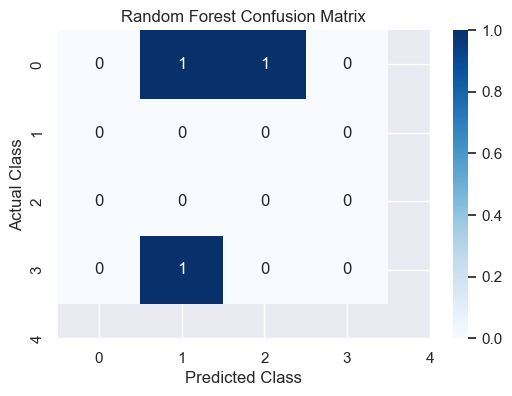

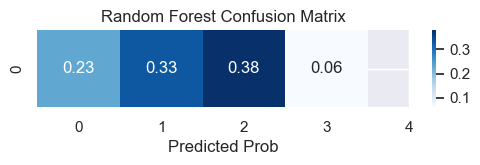

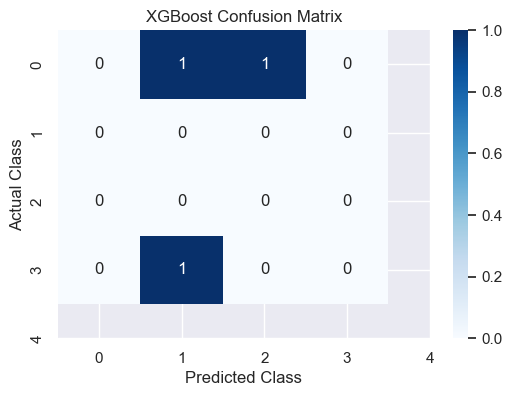

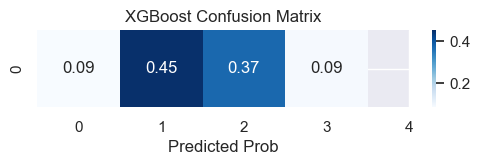

In [57]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_home_frw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

### Model vs Home

In [58]:
target = "GAC"  # Goals For

# Separate features and target
X = df_home_ga.drop(columns=[target])
y = df_home_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [59]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [60]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

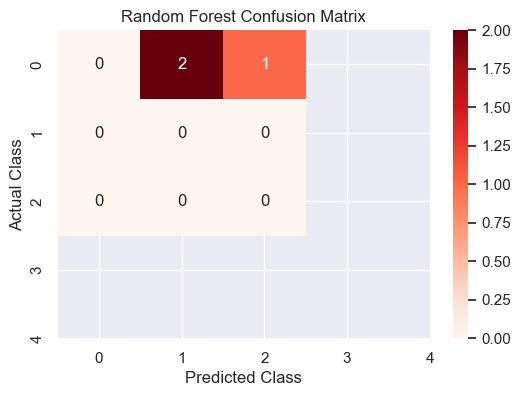

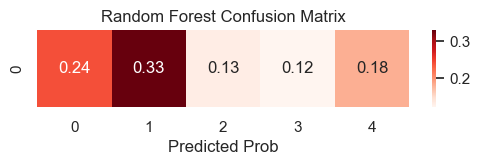

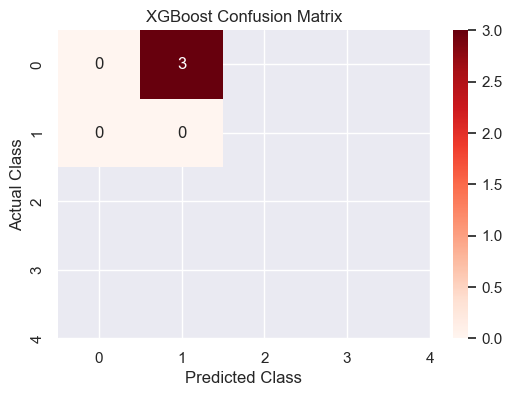

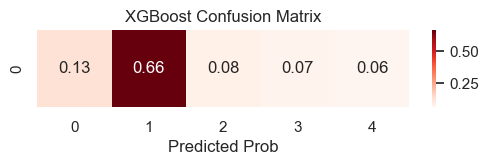

In [61]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_home_bcw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Reds', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

### Model Away

In [62]:
target = "GFC"  # Goals For

# Separate features and target
X = df_away_gf.drop(columns=[target])
y = df_away_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [63]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [64]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

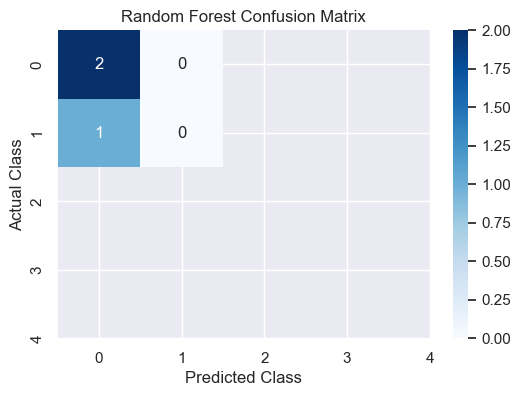

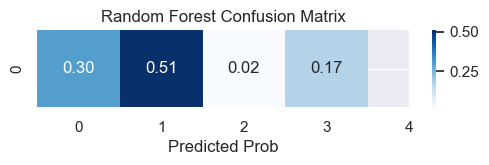

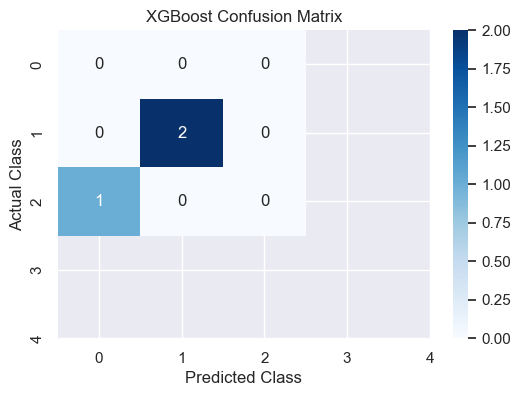

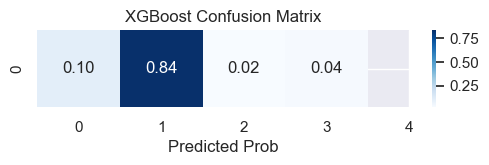

In [65]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_away_frw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

### Model vs Away

In [66]:
target = "GAC"  # Goals For

# Separate features and target
X = df_away_ga.drop(columns=[target])
y = df_away_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [67]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [68]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

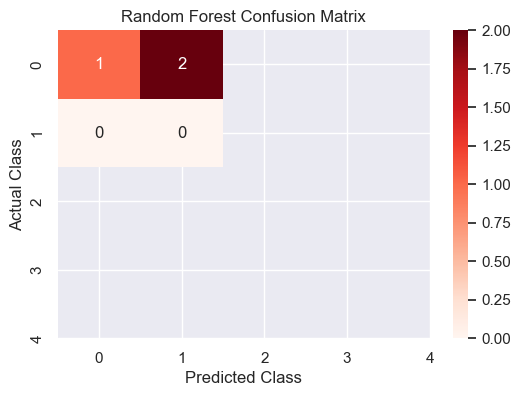

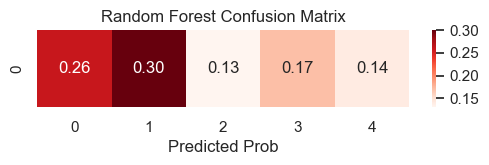

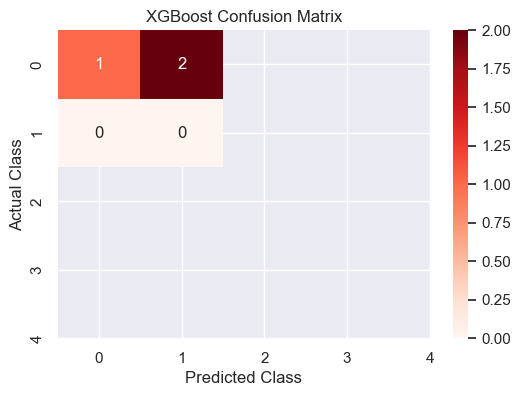

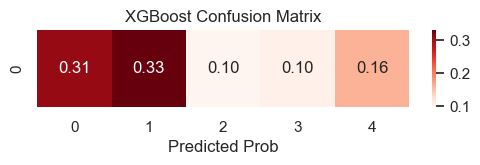

In [69]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_away_bcw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Reds', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

## Regression

### Model Home

In [67]:
target = "Tm_PTS"  # Goals For

# Separate features and target
X = df_home_gf.drop(columns=[target])
y = df_home_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [68]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [69]:
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

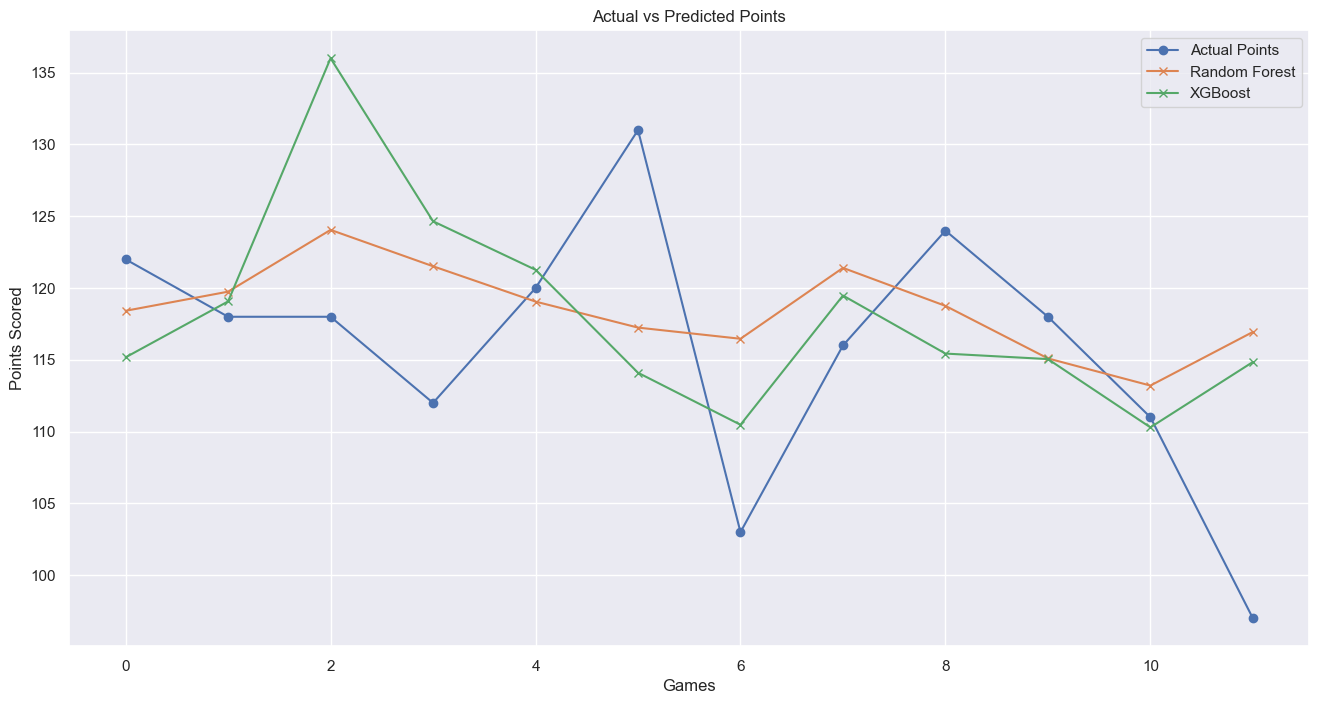

In [85]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

# Split into training and testing sets
train_size = int(len(X) * 0.8)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
# Train and evaluate each model
results = {}
plt.figure(figsize=(16,8))
plt.plot(y_test.values, label='Actual Points', marker='o')
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    plt.plot(y_pred, label=name, marker='x')
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_home_frw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred[0]}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T
plt.legend()
plt.title("Actual vs Predicted Points")
plt.xlabel("Games")
plt.ylabel("Points Scored")
plt.show()

In [80]:
results_df

,MAE,RMSE,PRED
Random Forest,7.063876,9.047376,117.443289
XGBoost,8.145854,10.362132,118.500099


### Model vs Home

In [48]:
target = "Opp_PTS"  # Goals For

# Separate features and target
X = df_home_ga.drop(columns=[target])
y = df_home_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [49]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [50]:
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 13.425
RMSE: 14.329


In [52]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_home_bcw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6818
[LightGBM] [Info] Number of data points in the train set: 52, number of used features: 405
[LightGBM] [Info] Start training from score 108.211538
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [53]:
results_df

,MAE,RMSE,PRED
Random Forest,13.041667,13.840622,[108.75]
XGBoost,13.151134,15.03493,[113.32865]
LightGBM,16.852781,18.445559,[102.71760442340414]
Linear Regression,24.528301,25.202121,[84.73789959470245]


### Model Away

In [54]:
target = "Tm_PTS"  # Goals For

# Separate features and target
X = df_away_gf.drop(columns=[target])
y = df_away_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [55]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [57]:
model_pipeline2 = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train the model
model_pipeline2.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline2.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 12.708
RMSE: 14.490


In [59]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_away_frw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6654
[LightGBM] [Info] Number of data points in the train set: 51, number of used features: 405
[LightGBM] [Info] Start training from score 121.941176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [60]:
results_df

,MAE,RMSE,PRED
Random Forest,14.915,16.475376,[120.74]
XGBoost,12.521159,13.834184,[121.489395]
LightGBM,13.837515,17.031631,[126.221659266553]
Linear Regression,14.006226,16.370987,[137.60611314295068]


### Model vs Away

In [61]:
target = "Opp_PTS"  # Goals For

# Separate features and target
X = df_away_ga.drop(columns=[target])
y = df_away_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [62]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [63]:
model_pipeline2 = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train the model
model_pipeline2.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline2.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 10.350
RMSE: 11.309


In [65]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_away_bcw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6692
[LightGBM] [Info] Number of data points in the train set: 51, number of used features: 405
[LightGBM] [Info] Start training from score 110.666667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [66]:
results_df

,MAE,RMSE,PRED
Random Forest,11.596667,12.906048,[108.99]
XGBoost,15.120514,16.820382,[102.5551]
LightGBM,9.838286,11.897321,[109.56588285586935]
Linear Regression,14.973625,19.146221,[86.82162740707135]
